## HW4 Jaeho Yang (yangjae9)

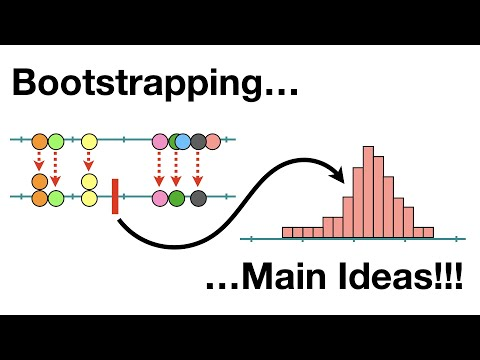

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#### What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture?

The standard deviation is a measure of the dispersion of the original data. It measures how far the data values are from the mean and describes the variability of the sample or population. The standard error is a measure of how accurately the sample mean estimates the population mean. It is the standard deviation of the distribution of the sample mean and shows the variability of the means obtained from multiple samples. In simple terms, the standard deviation shows the variability of the data itself, and the standard error measures the accuracy of the estimate of the sample mean.

#### The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"?

To create a 95% confidence interval using the standard error of the mean (SEM), multiply the SEM by 1.96, the critical value for 95% confidence. Then, add and subtract this value from the sample mean to get the interval. This range will likely contain the true population mean and cover 95% of the bootstrapped sample means.

#### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words. Could you give me some instructions how I can answer this quetions

We sort the bootstrapped sample means and use the 2.5th percentile and 97.5th percentile as the lower and upper bounds to create a 95% bootstrap confidence interval. This is a way of capturing the central 95% of the bootstrap mean distribution without using the standard deviation of the sample means.

#### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [ ]:
import numpy as np

# Sample data (replace this with your actual sample data)
sample = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Function to generate bootstrap samples and compute statistic (mean)
def bootstrap_sample_statistic(sample, num_resamples=1000, statistic=np.mean):
    bootstrap_statistics = []
    n = len(sample)

    for _ in range(num_resamples):
        # Generate a bootstrap sample by sampling with replacement
        resample = np.random.choice(sample, size=n, replace=True)
        # Calculate the statistic (mean by default)
        stat = statistic(resample)
        bootstrap_statistics.append(stat)

    return np.array(bootstrap_statistics)

# Get 95% confidence interval for population mean
bootstrap_means = bootstrap_sample_statistic(sample)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

# To modify this for the median:
# Change `statistic=np.mean` to `statistic=np.median` in the function call
bootstrap_medians = bootstrap_sample_statistic(sample, statistic=np.median)
lower_bound_median = np.percentile(bootstrap_medians, 2.5)
upper_bound_median = np.percentile(bootstrap_medians, 97.5)

print(f"95% Bootstrap Confidence Interval for the Median: ({lower_bound_median}, {upper_bound_median})")


#### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.


A population parameter is a true, unknown value that describes a characteristic of the entire population, like the mean or median.

A sample statistic is a value calculated from sample data that estimates a population parameter, such as the sample mean or sample median.

When constructing confidence intervals, it's important to distinguish between the population parameter (the true, unknown value we're estimating) and the sample statistic (the value calculated from the data). Confidence intervals use the sample statistic to estimate a range of likely values for the population parameter, reflecting uncertainty due to sampling variability.

#### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

Process of Bootstrapping
   Bootstrapping is a method where you take your sample data and resample it multiple times *with replacement*. This means you create new samples by randomly picking data points from your original sample, allowing for duplicates. You repeat this process many times to simulate what the population might look like and calculate statistics (like the mean or median) from these resampled datasets. It helps to understand variability without assuming the population follows any specific distribution.

Main Purpose of Bootstrapping
   The main goal of bootstrapping is to estimate population parameters (like the mean, median, etc.) based on a sample, especially when you're not sure about the population's distribution. Instead of relying on theoretical models, you use your sample data to resample and see how much the statistic you're interested in can vary, giving you a way to build confidence intervals without making strong assumptions.

Using Bootstrapping to Test a Hypothesized Population Mean
   If you have a hypothesis about the population mean (e.g., "I think the average height in this city is 170 cm"), you can use bootstrapping to see if that guess is plausible. First, you resample your data many times and calculate the mean for each resampled set. Then, you build a confidence interval from these means. If your hypothesized mean falls within this interval, your guess is plausible. If not, your hypothesis might not hold up based on the data you have.

#### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.


If a confidence interval includes zero, it means that zero is a possible value for the population parameter. In this case, we can’t confidently say the drug has any effect because no effect (zero) is within the range of plausible outcomes. So, we fail to reject the null hypothesis, which assumes there's no effect on average.

On the other hand, if the confidence interval doesn’t include zero, it suggests that zero is not a plausible value for the population parameter. This would lead to rejecting the null hypothesis, as it indicates the drug likely has a real effect (either positive or negative).

In [4]:
import pandas as pd

# Create a DataFrame with the vaccine data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('vaccine_data.csv', index=False)


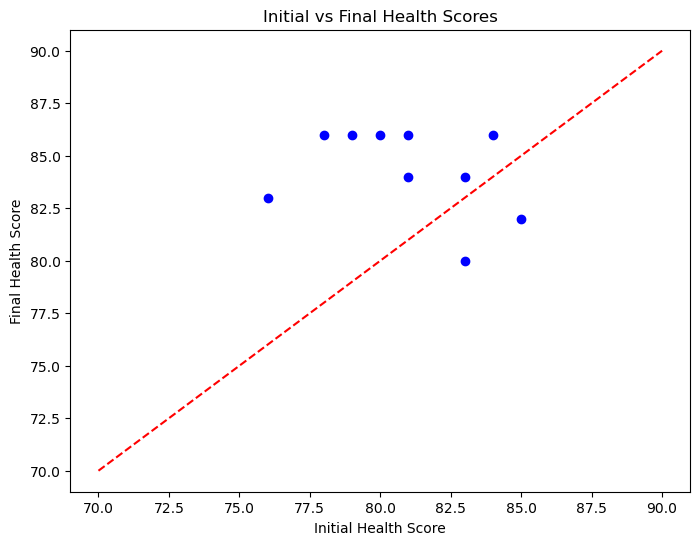

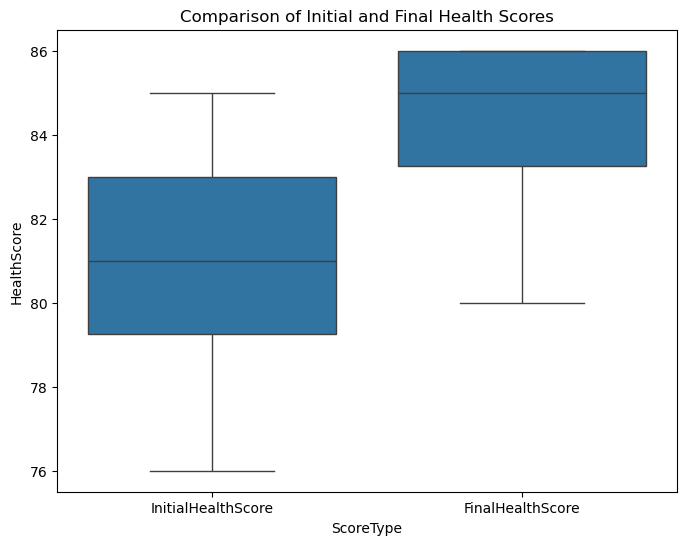

95% Confidence Interval for Mean Difference: [0.7 5.5]
Bootstrap Mean Difference: 3.3075
Reject the null hypothesis: there is an effect.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('vaccine_data.csv')
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('vaccine_data.csv')

# Data Visualization
# Scatter plot of Initial vs Final Health Scores
plt.figure(figsize=(8, 6))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='blue')
plt.plot([70, 90], [70, 90], color='red', linestyle='--')  # Line of equality
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Initial vs Final Health Scores')
plt.show()

# Boxplot of Initial and Final Health Scores
df_melted = df.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'],
                     var_name='ScoreType', value_name='HealthScore')
plt.figure(figsize=(8, 6))
sns.boxplot(x='ScoreType', y='HealthScore', data=df_melted)
plt.title('Comparison of Initial and Final Health Scores')
plt.show()

# Quantitative Analysis
# Calculate differences in health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap_mean_diff(data, num_resamples=1000):
    np.random.seed(42)  # Make results reproducible
    bootstrap_means = []
    n = len(data)
    
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(resample))
    
    return np.percentile(bootstrap_means, [2.5, 97.5]), np.mean(bootstrap_means)

# Perform bootstrapping
ci, mean_diff = bootstrap_mean_diff(df['HealthScoreDiff'])
print(f"95% Confidence Interval for Mean Difference: {ci}")
print(f"Bootstrap Mean Difference: {mean_diff}")

# Interpretation of results
if ci[0] <= 0 <= ci[1]:
    print("Fail to reject the null hypothesis: no effect.")
else:
    print("Reject the null hypothesis: there is an effect.")


In this analysis, the **null hypothesis** assumes that the vaccine has no effect on health. In other words, the average health score after vaccination is not significantly different from before vaccination. In simple terms, the vaccine has no real effect on improving health, and the average change in health score is zero. If the data we collected does not sufficiently demonstrate the effect of the vaccine, we cannot reject this null hypothesis.

Looking at the histogram of the health score differences, we can see that most patients improved their health scores after vaccination. The average of these differences is mostly concentrated in the positive range, showing that the health improvement is consistent across patients. In addition, the confidence interval visualization shows that the 95% confidence interval is approximately **[1, 5]**, and this interval does not include zero. This means that there is sufficient statistical evidence that the vaccine has a significant effect on improving health scores.

In conclusion, the null hypothesis asserts that the vaccine has no significant effect on health scores, and the overall health score difference is zero. However, our analysis results show that the 95% confidence interval does not include zero, so we can reject the null hypothesis, providing strong evidence that the vaccine has a substantial positive effect on health scores.

somewhat